['CATAID', 'ELLIPTICAL', 'ELLIPTICAL_CODE', 'HUBBLE_TYPE_SPD', 'HUBBLE_TYPE_SPD_CODE', 'HUBBLE_TYPE_LSK', 'HUBBLE_TYPE_LSK_CODE', 'HUBBLE_TYPE_ASGR', 'HUBBLE_TYPE_ASGR_CODE', 'HUBBLE_TYPE', 'HUBBLE_TYPE_CODE', 'ASGR_DISTURBED', 'ASGR_NORMAL', 'ASGR_UNSURE', 'ASGR_CLASSIFIERS', 'ASGR_PROBDIST', 'P_EL', 'P_CS', 'P_EL_DEBIASED', 'P_CS_DEBIASED', 'URL_IMG', 'Z_1', 'nQ_1', 'SURVEY_CODE', 'SURVEY_CLASS', 'Z_TONRY_1', 'fluxscale', 'zmax_19p8', 'zmax_19p4', 'zmax_19p0', 'zmax_17p8', 'nbands', 'S2N', 'PPP', 'logmstar', 'dellogmstar', 'logmoverl_i', 'dellogmoverl_i', 'logage', 'dellogage', 'logtau', 'dellogtau', 'logmintsfh', 'dellogmintsfh', 'logmremnants', 'dellogmremnants', 'metal', 'delmetal', 'extBV', 'delextBV', 'logLWage', 'dellogLWage', 'gminusi', 'delgminusi', 'uminusr', 'deluminusr', 'gminusi_stars', 'uminusr_stars', 'C_logM_ur', 'C_logM_gi', 'C_logM_eBV', 'fitphot_u', 'delfitphot_u', 'absmag_u', 'delabsmag_u', 'absmag_u_stars', 'fitphot_g', 'delfitphot_g', 'absmag_g', 'delabsmag_g', '

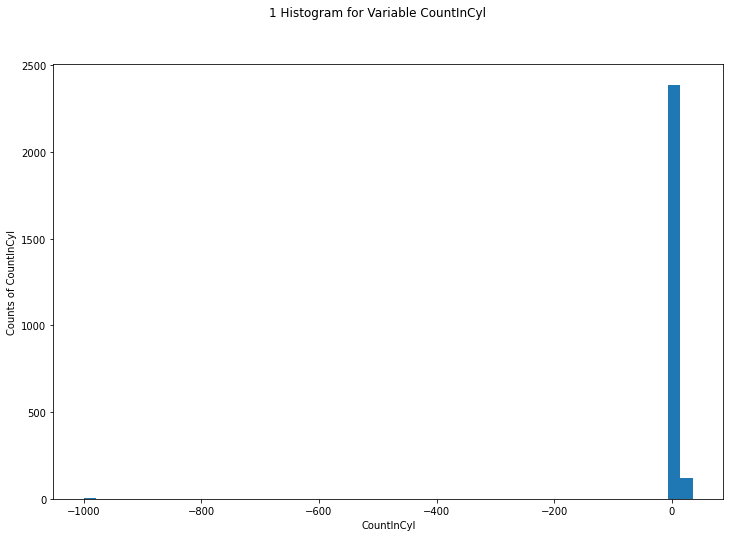

CountInCyl : max : 35.692 min : 0.0
Number of zeros : 595


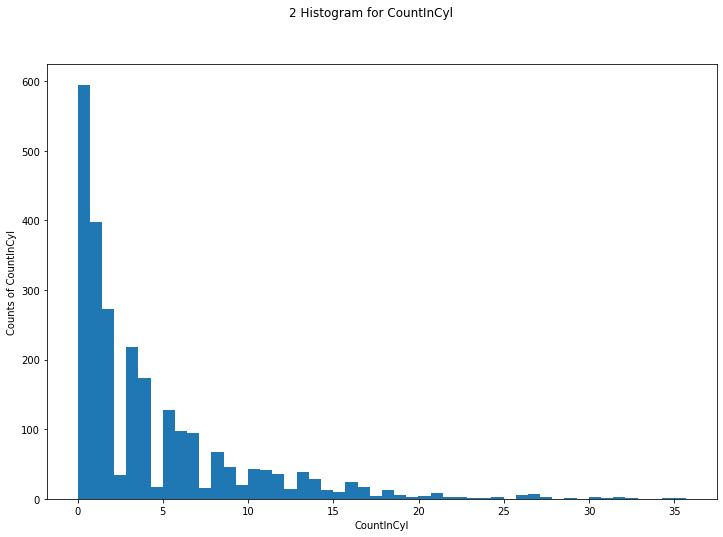

DistanceTo5nn : max : 15.117 min : 0.116
Number of zeros : 0


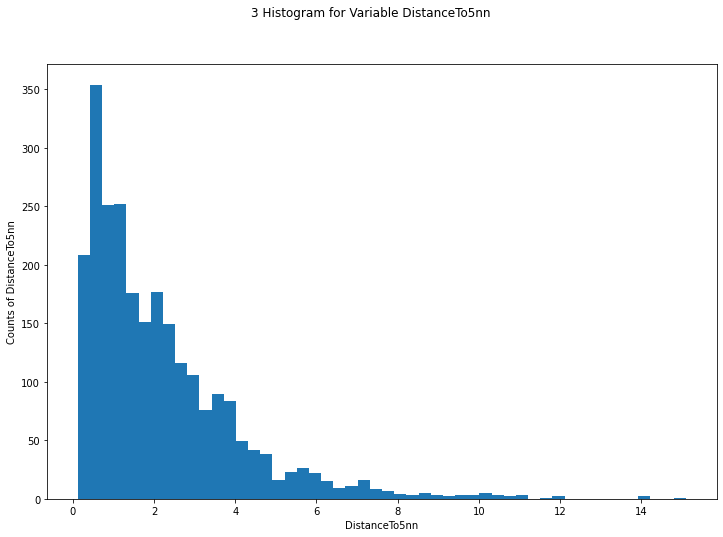

Log(DistanceTo5nn) : max : 1.1794657 min : -0.93554205
Number of zeros : 2


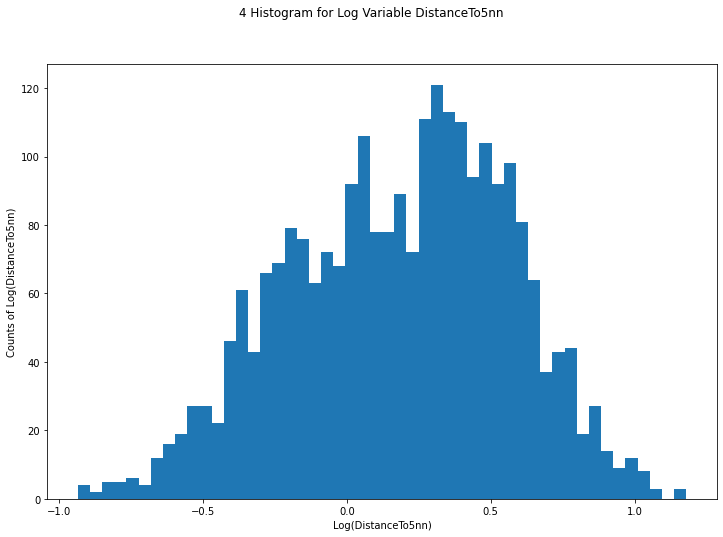

metal : max : 0.0474497 min : 0.00077904685
Number of zeros : 0


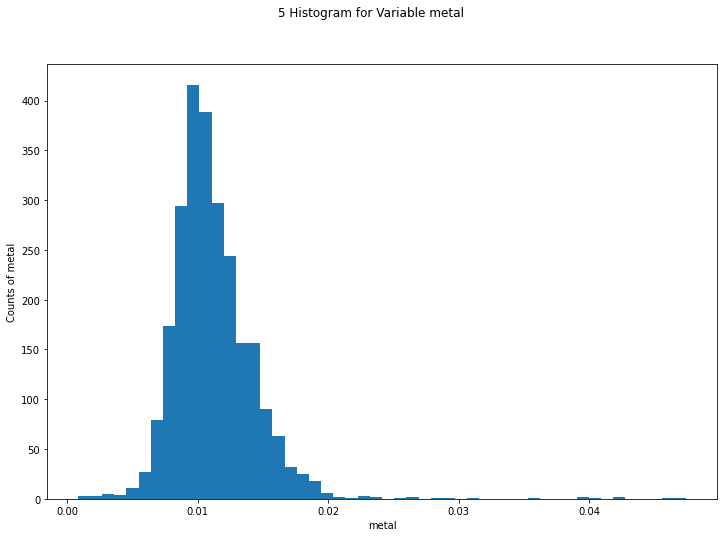

SurfaceDensity : max : 2298.898 min : -999.9
Number of zeros : 0


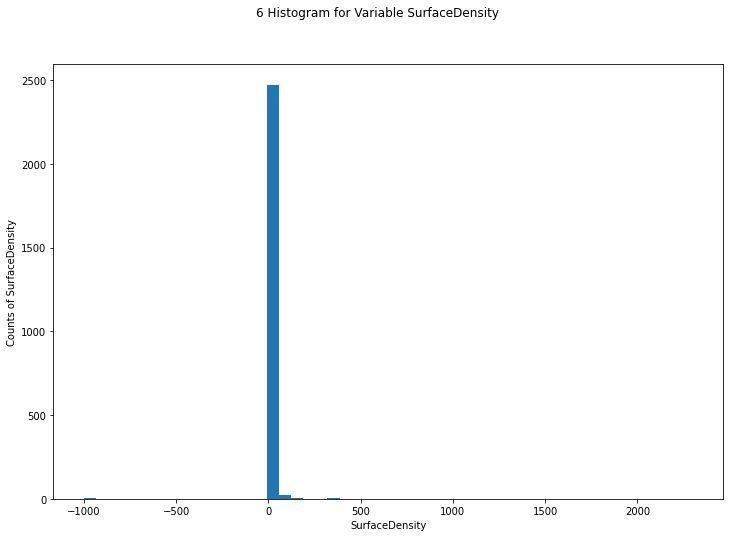

In [1]:
from astropy.table import Table, join
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

table = Table.read('../../GAMA_Data/REMassEClassEmeasure.fits')
print(table.colnames)
print('')

def details(plot, var) :
    print(var+' : max : '+str(max(table[var]))+' min : '+str(min(table[var])))
    print('Number of zeros : '+str(len(table[var]) - np.count_nonzero(table[var])))
    counts, bins = np.histogram(table[var],bins=50)
    fig, ax = plt.subplots(1, 1, figsize=(12,8)) # make the figure with the size 10 x 8 inches
    fig.suptitle(str(plot)+" Histogram for Variable "+var)
    ax.set_xlabel(var)
    ax.set_ylabel('Counts of '+str(var))
    plt.hist(bins[:-1], bins, weights=counts)
    plt.show()
    
def logDetails(plot, var) :
    logVar = np.log10(table[var])
    print('Log('+var+') : max : '+str(max(logVar))+' min : '+str(min(logVar)))
    print('Number of zeros : '+str(len(logVar) - np.count_nonzero(logVar)))
    counts, bins = np.histogram(logVar,bins=50)
    fig, ax = plt.subplots(1, 1, figsize=(12,8)) # make the figure with the size 10 x 8 inches
    fig.suptitle(str(plot)+" Histogram for Log Variable "+var)
    ax.set_xlabel('Log('+var+')')
    ax.set_ylabel('Counts of Log('+str(var)+')')
    plt.hist(bins[:-1], bins, weights=counts)
    plt.show()
      
def CinCDetails(plot, var) :
    CinC = table[table[var] > -500]
    print(var+' : max : '+str(max(CinC[var]))+' min : '+str(min(CinC[var])))
    print('Number of zeros : '+str(len(CinC[var]) - np.count_nonzero(CinC[var])))
    counts, bins = np.histogram(CinC[var],bins=50)
    fig, ax = plt.subplots(1, 1, figsize=(12,8)) # make the figure with the size 10 x 8 inches
    fig.suptitle(str(plot)+" Histogram for "+var)
    ax.set_xlabel(var)
    ax.set_ylabel('Counts of '+str(var))
    plt.hist(bins[:-1], bins, weights=counts)
    plt.show()
details(1,'CountInCyl')
CinCDetails(2,'CountInCyl')
details(3,'DistanceTo5nn')
logDetails(4,'DistanceTo5nn')
details(5,'metal')
details(6,'SurfaceDensity')